_Lambda School Data Science, Unit 2_

# Classification 2 Sprint Challenge: Predict Chicago food inspections 🍔

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [ ]:
#There is some leakage in the feature "Inspection Type" 
#because some of the Inspection Type values include those that say "Illegal Operation" or "Out of Business" or "Repeat Inspection"

In [222]:
conda install -c conda-forge shap 

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.1.23-0, anaconda::openssl-1.1.1b-he774522_1
  - anaconda::openssl-1.1.1b-he774522_1, defaults::ca-certificates-2019.1.23-0
  - anaconda::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1
  - defaults::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    shap-0.29.2                |   py37he350917_0         319 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         319 KB

The following NEW packages will be INSTALLED:

  shap               conda-forge/win-64::shap-0.29.2-py37he350917_0




shap-0.29.2          | 319 KB    |            |   0% 
shap-0.29

In [180]:
conda install -c conda-forge eli5

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.1.23-0, anaconda::openssl-1.1.1b-he774522_1
  - anaconda::openssl-1.1.1b-he774522_1, defaults::ca-certificates-2019.1.23-0
  - anaconda::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1
  - defaults::ca-certificates-2019.1.23-0, defaults::openssl-1.1.1b-he774522_1done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - eli5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    eli5-0.8.2                 |             py_0          66 KB  conda-forge
    tabulate-0.8.3             |             py_0          23 KB  conda-forge
    typing-3.6.4               |           py37_0          44 KB
    ------------------------------------------------------------
                                           Total:         133 KB

The following NEW packages will be INST

In [233]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [234]:
train.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0


In [235]:
pip install pdpbox

Note: you may need to restart the kernel to use updated packages.


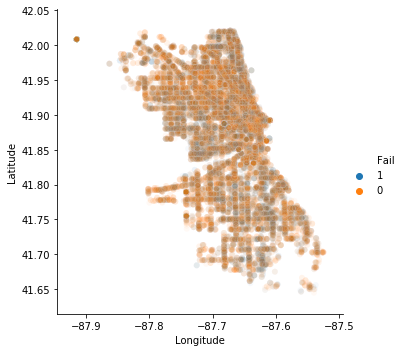

In [236]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt
sns.relplot(x='Longitude', y='Latitude',hue = 'Fail', data=train, alpha=0.04, hue_order=[1, 0])

In [237]:
train.isnull().sum()/len(train.values)
#strategies: to drop:
#['InspectionID', 'DBA Name', 'AKA Name', 'License #', 'Address', 'City', 'State', 'Zip', 'Inspection Date', 'Latitude', 'Longitude','Violations']

Inspection ID      0.000000
DBA Name           0.000000
AKA Name           0.012000
License #          0.000096
Facility Type      0.004315
Risk               0.000231
Address            0.000000
City               0.001021
State              0.000193
Zip                0.000501
Inspection Date    0.000000
Inspection Type    0.000019
Violations         0.185973
Latitude           0.003814
Longitude          0.003814
Location           0.003814
Fail               0.000000
dtype: float64

In [238]:
train['Fail'].value_counts(normalize=True)

0    0.74139
1    0.25861
Name: Fail, dtype: float64

In [239]:
# train['Facility Type'] = train['Facility Type'].str.upper()
# train['Facility Type'].value_counts()

from sklearn.model_selection import train_test_split

X = train.drop(columns = 'Fail')
y = train['Fail']
X.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':..."
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'..."


In [240]:
# train = train.fillna('OTHER')
# train.isnull().sum()

In [241]:
# train[train['Facility Type'].str.contains('GROCERY', na=False)] = 'GROCERY'
# train[train['Facility Type'].str.contains('STORE', na=False)] = 'STORE'
# train[train['Facility Type'].str.contains('MARKET', na=False)] = 'STORE'
# train[train['Facility Type'].str.contains('DELI', na=False)] = 'DELI'
# train[train['Facility Type'].str.contains('CARE', na=False)] = 'DAYCARE'
# train[train['Facility Type'].str.contains('DESSERT', na=False)] = 'RESTAURANT'
# train[train['Facility Type'].str.contains('DIN', na=False)] = 'RESTAURANT'
# train[train['Facility Type'].str.contains('ICE', na=False)] = 'RESTAURANT'
# train[train['Facility Type'].str.contains('VEND', na=False)] = 'VENDOR'
# train[train['Facility Type'].str.contains('BAKERY', na=False)] = 'CAFE'
# train[train['Facility Type'].str.contains('COFFEE', na=False)] = 'CAFE'
# train[train['Facility Type'].str.contains('TEA', na=False)] = 'CAFE'
# train[train['Facility Type'].str.contains('JUICE', na=False)] = 'CAFE'
# train[train['Facility Type'].isin(facindex)] = 'OTHER'
# train['Facility Type'].value_counts()

In [242]:
import sys
import numpy as np
np.set_printoptions(threshold=np.inf)

# #train['Violations'].value_counts() - High Cardinality
# occurencesOfFacility = train['Facility Type'].value_counts()
# occurencesOfFacility = pd.DataFrame(occurencesOfFacility)
# fac = occurencesOfFacility.loc[occurencesOfFacility['Facility Type'] == 1]
# facindex = fac.index
# train[train['Facility Type'].isin(facindex)] = 'OTHER'
# train['Facility Type'].value_counts()

In [243]:

X = X.copy()
X = X.drop(['DBA Name', 'AKA Name', 'License #', 'Address', 'City', 'State', 'Zip', 'Inspection Date', 'Latitude', 'Longitude','Violations'], axis = 1)

X['Facility Type'] = X['Facility Type'].str.upper()

X[X['Facility Type'].str.contains('GROCERY', na=False)] = 'GROCERY'
X[X['Facility Type'].str.contains('STORE', na=False)] = 'STORE'
X[X['Facility Type'].str.contains('MARKET', na=False)] = 'STORE'
X[X['Facility Type'].str.contains('DELI', na=False)] = 'DELI'
X[X['Facility Type'].str.contains('CARE', na=False)] = 'DAYCARE'
X[X['Facility Type'].str.contains('DESSERT', na=False)] = 'RESTAURANT'
X[X['Facility Type'].str.contains('DIN', na=False)] = 'RESTAURANT'
X[X['Facility Type'].str.contains('ICE', na=False)] = 'RESTAURANT'
X[X['Facility Type'].str.contains('VEND', na=False)] = 'VENDOR'
X[X['Facility Type'].str.contains('BAKERY', na=False)] = 'CAFE'
X[X['Facility Type'].str.contains('COFFEE', na=False)] = 'CAFE'
X[X['Facility Type'].str.contains('TEA', na=False)] = 'CAFE'
X[X['Facility Type'].str.contains('JUICE', na=False)] = 'CAFE'

occurencesOfFacility = X['Facility Type'].value_counts()
occurencesOfFacility = pd.DataFrame(occurencesOfFacility)
fac = occurencesOfFacility.loc[occurencesOfFacility['Facility Type'] == 1]
facindex = fac.index

X[X['Facility Type'].isin(facindex)] = 'OTHER'

# X = wrangle(X)

In [244]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size = 0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size = 0.2, 
    stratify=y_trainval, random_state=42)

In [245]:
from sklearn.metrics import roc_auc_score
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['Inspection ID', 'Facility Type', 'Risk', 'Inspection Type', 'Location'],
        drop_invariant=False, handle_unknown='impute', impute_missing=True,
        mapping=[{'col': 'Inspection ID', 'mapping': [(1537453, 1), (1138589, 2), (1506437, 3), (157541...imators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [246]:
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.6542674852534007

In [247]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=300, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.7387745275069219

In [248]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.BinaryEncoder(), 
    XGBClassifier(n_estimators=300, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.7414228963524738

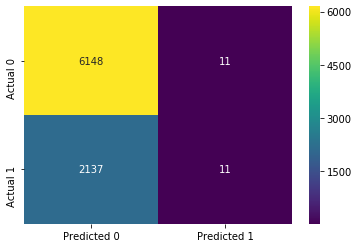

In [249]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
plot_confusion_matrix(y_val, y_pred);

In [250]:
help(randomsearch)

Help on RandomizedSearchCV in module sklearn.model_selection._search object:

class RandomizedSearchCV(BaseSearchCV)
 |  RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Randomized search on hyper parameters.
 |  
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |  
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter se

In [251]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.BinaryEncoder(), 
    XGBClassifier()
)

param_distributions = {
    'xgbclassifier__n_estimators': randint(5, 10)
}

randomsearch = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter = 5,
    cv=3,
    scoring='accuracy',
    verbose=10,
    return_train_score=True
)

randomsearch.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] xgbclassifier__n_estimators=9 ...................................
[CV]  xgbclassifier__n_estimators=9, score=0.741332611050921, total=   1.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] xgbclassifier__n_estimators=9 ...................................
[CV]  xgbclassifier__n_estimators=9, score=0.7413995485327314, total=   1.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] xgbclassifier__n_estimators=9 ...................................
[CV]  xgbclassifier__n_estimators=9, score=0.7413761964962976, total=   1.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s


[CV] xgbclassifier__n_estimators=6 ...................................
[CV]  xgbclassifier__n_estimators=6, score=0.741332611050921, total=   1.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.5s remaining:    0.0s


[CV] xgbclassifier__n_estimators=6 ...................................
[CV]  xgbclassifier__n_estimators=6, score=0.7413995485327314, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s remaining:    0.0s


[CV] xgbclassifier__n_estimators=6 ...................................
[CV]  xgbclassifier__n_estimators=6, score=0.7413761964962976, total=   1.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.8s remaining:    0.0s


[CV] xgbclassifier__n_estimators=8 ...................................
[CV]  xgbclassifier__n_estimators=8, score=0.741332611050921, total=   1.2s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.9s remaining:    0.0s


[CV] xgbclassifier__n_estimators=8 ...................................
[CV]  xgbclassifier__n_estimators=8, score=0.7413995485327314, total=   1.2s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.0s remaining:    0.0s


[CV] xgbclassifier__n_estimators=8 ...................................
[CV]  xgbclassifier__n_estimators=8, score=0.7413761964962976, total=   1.2s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.2s remaining:    0.0s


[CV] xgbclassifier__n_estimators=5 ...................................
[CV]  xgbclassifier__n_estimators=5, score=0.741332611050921, total=   1.4s
[CV] xgbclassifier__n_estimators=5 ...................................
[CV]  xgbclassifier__n_estimators=5, score=0.7413995485327314, total=   1.4s
[CV] xgbclassifier__n_estimators=5 ...................................
[CV]  xgbclassifier__n_estimators=5, score=0.7413761964962976, total=   1.1s
[CV] xgbclassifier__n_estimators=5 ...................................
[CV]  xgbclassifier__n_estimators=5, score=0.741332611050921, total=   1.2s
[CV] xgbclassifier__n_estimators=5 ...................................
[CV]  xgbclassifier__n_estimators=5, score=0.7413995485327314, total=   1.5s
[CV] xgbclassifier__n_estimators=5 ...................................
[CV]  xgbclassifier__n_estimators=5, score=0.7413761964962976, total=   1.4s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   32.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('binaryencoder', BinaryEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
       impute_missing=True, return_df=True, verbose=0)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'xgbclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000224412A8C50>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=10)

In [252]:

enc = ce.OrdinalEncoder()
enc.fit(X_train)
X_train_encoded = enc.transform(X_train)
X_val_encoded = enc.transform(X_val)
X_test_encoded = enc.transform(X_test)
X_train_encoded.head(2)

,Inspection ID,Facility Type,Risk,Inspection Type,Location
38692,1,1,1,1,1
51464,2,1,1,2,2


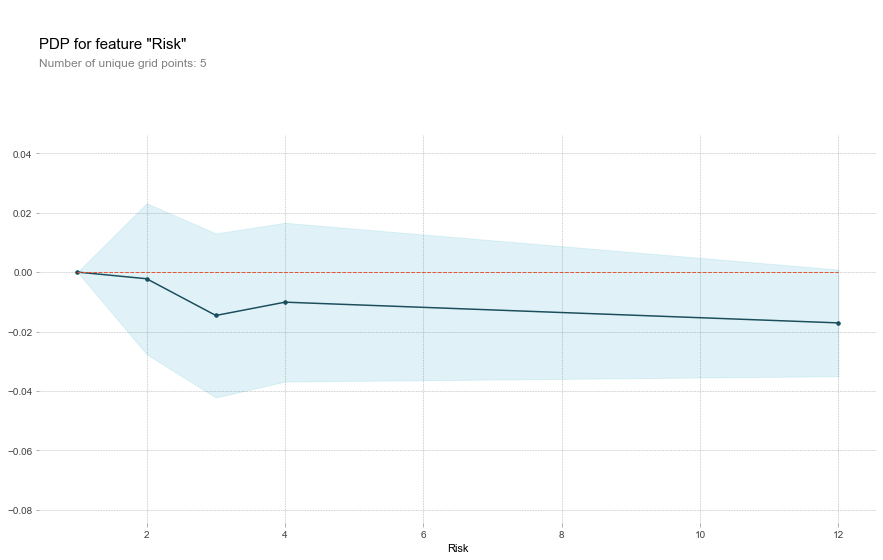

In [253]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

model = XGBClassifier(n_estimators=100, n_jobs=-1)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_val_encoded)

feature = 'Risk'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

# features = ['Risk','Facility Type']

# interaction = pdp_isolate(
#     model=model, 
#     dataset=X_val_encoded, 
#     model_features=X_val_encoded.columns, 
#     feature=feature
# )

# pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

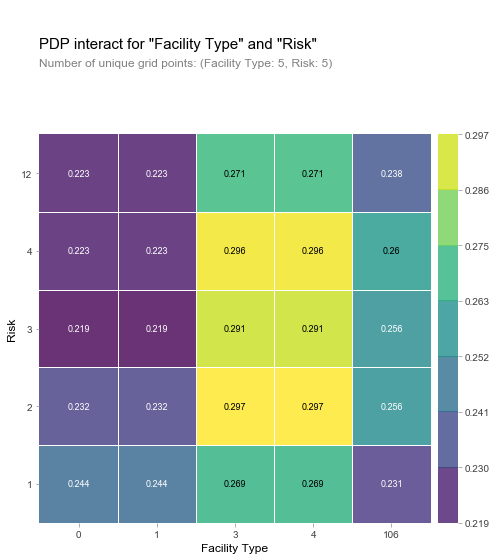

In [254]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Facility Type', 'Risk']

interaction = pdp_interact(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [255]:
X_val_encoded.head(2)

,Inspection ID,Facility Type,Risk,Inspection Type,Location
34387,5,3,2,4,5
23143,0,1,1,3,195


In [256]:
X_train_encoded.head(2)

,Inspection ID,Facility Type,Risk,Inspection Type,Location
38692,1,1,1,1,1
51464,2,1,1,2,2


In [257]:
permuter = PermutationImportance(model, scoring='accuracy', 
                                 cv='prefit', n_iter=2, random_state=42)
permuter.fit(X_val_encoded, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0006 ± 0.0002,Inspection Type
0.0005 ± 0.0002,Facility Type
0.0001 ± 0.0001,Location
0.0001 ± 0.0004,Risk
-0.0001 ± 0.0000,Inspection ID


In [258]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=10, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', #roc auc
          early_stopping_rounds=10)

[0]	validation_0-auc:0.641707	validation_1-auc:0.549906
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.645575	validation_1-auc:0.613398
[2]	validation_0-auc:0.63377	validation_1-auc:0.604667
[3]	validation_0-auc:0.624022	validation_1-auc:0.613523
[4]	validation_0-auc:0.633192	validation_1-auc:0.629579
[5]	validation_0-auc:0.634344	validation_1-auc:0.633457
[6]	validation_0-auc:0.634348	validation_1-auc:0.633408
[7]	validation_0-auc:0.63435	validation_1-auc:0.633387
[8]	validation_0-auc:0.635142	validation_1-auc:0.634749
[9]	validation_0-auc:0.635211	validation_1-auc:0.63465


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [259]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

In [262]:
import shap
shap.initjs()

In [266]:
X_test

,Inspection ID,Facility Type,Risk,Inspection Type,Location
50665,585249,RESTAURANT,Risk 1 (High),License Re-Inspection,"{'longitude': '-87.70907871582135', 'latitude'..."
12461,1546485,STADIUM,Risk 1 (High),Complaint Re-Inspection,"{'longitude': '-87.65641794764645', 'latitude'..."
1581,1704226,RESTAURANT,Risk 1 (High),Canvass,"{'longitude': '-87.71704869968485', 'latitude'..."
41771,2050468,SCHOOL,Risk 1 (High),Canvass,"{'longitude': '-87.78355193935316', 'latitude'..."
8060,1166447,RESTAURANT,Risk 1 (High),Complaint,"{'longitude': '-87.75400366103027', 'latitude'..."
14787,575226,RESTAURANT,Risk 1 (High),Canvass,"{'longitude': '-87.63247630514623', 'latitude'..."
27000,2129837,RESTAURANT,Risk 1 (High),Canvass,"{'longitude': '-87.7435650331494', 'latitude':..."
32218,RESTAURANT,RESTAURANT,RESTAURANT,RESTAURANT,RESTAURANT
5647,GROCERY,GROCERY,GROCERY,GROCERY,GROCERY
49888,1533116,RESTAURANT,Risk 1 (High),License,"{'longitude': '-87.63620087405286', 'latitude'..."


In [267]:
data_for_prediction = X_test[X_test.index==1581]
data_for_prediction

,Inspection ID,Facility Type,Risk,Inspection Type,Location
1581,1704226,RESTAURANT,Risk 1 (High),Canvass,"{'longitude': '-87.71704869968485', 'latitude'..."


In [269]:
explainer = shap.TreeExplainer(model)

shap.initjs()

data_for_prediction_processed = processor.transform(data_for_prediction)
data_for_prediction_processed = pd.DataFrame(data_for_prediction_processed)
data_for_prediction_processed.columns = data_for_prediction.columns

shap_values = explainer.shap_values(data_for_prediction_processed)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

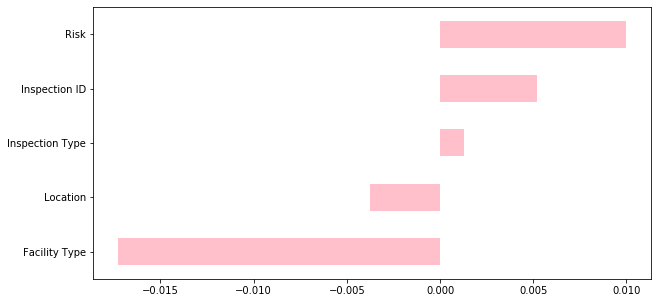

In [275]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
pd.Series(shap_values[0], X_test.columns).sort_values().plot.barh(color='pink')

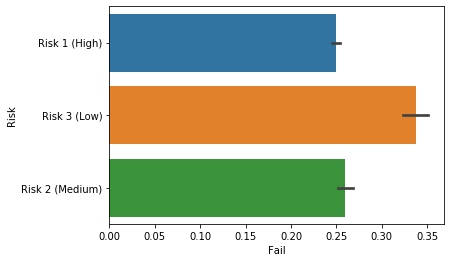

In [276]:
import seaborn as sns
feature = 'Fail'
sns.barplot(x=train[feature], 
            y=train['Risk']);

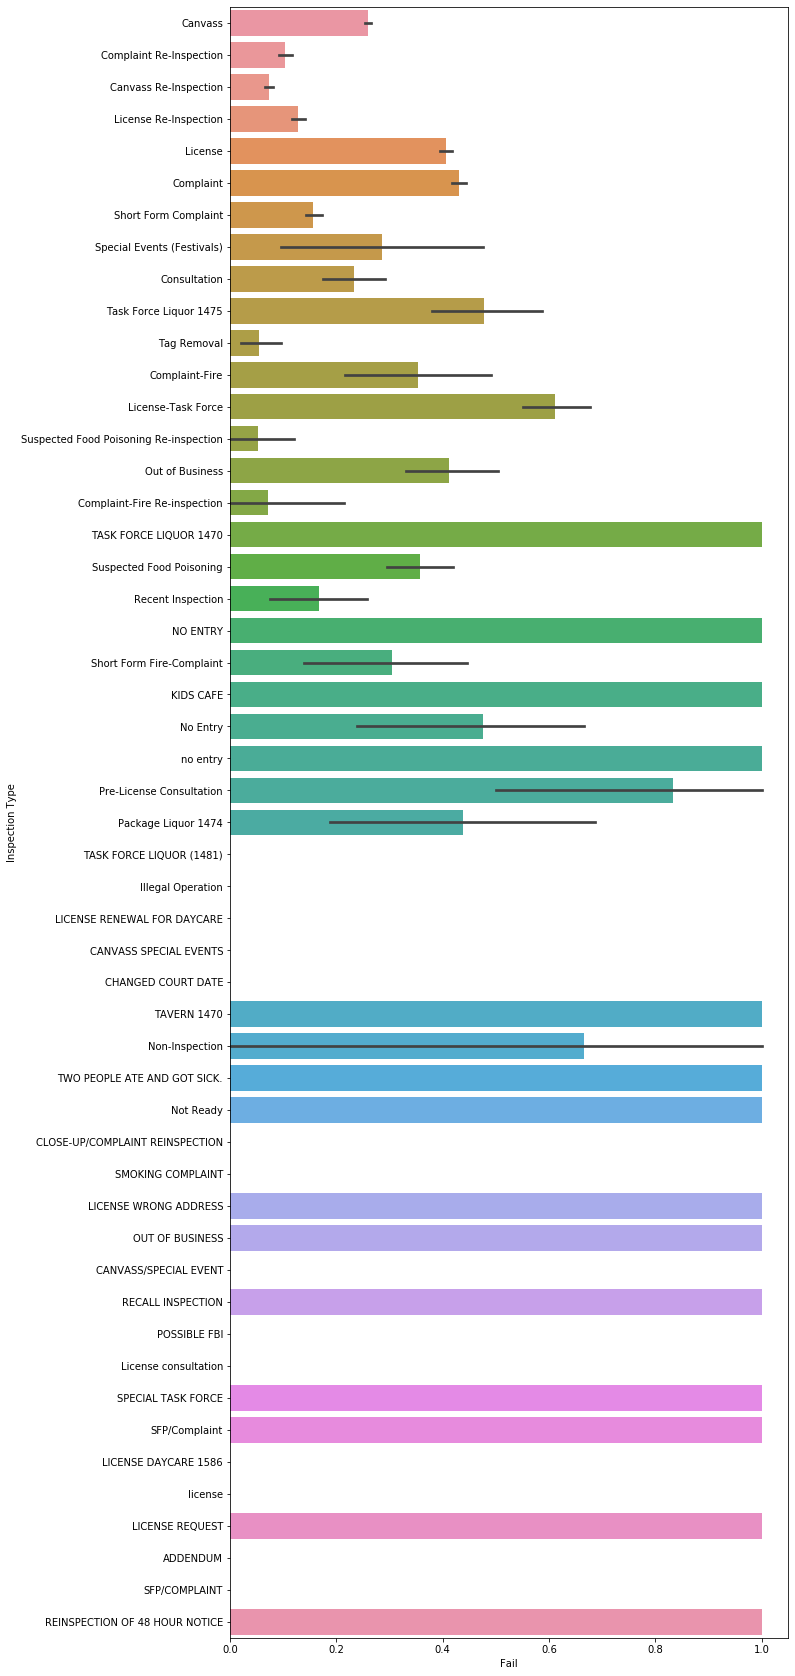

In [283]:
from matplotlib import pyplot
feature = 'Fail'
fig, ax = pyplot.subplots(figsize=(10, 30))
sns.barplot(x=train[feature], 
            y=train['Inspection Type'], ax = ax);

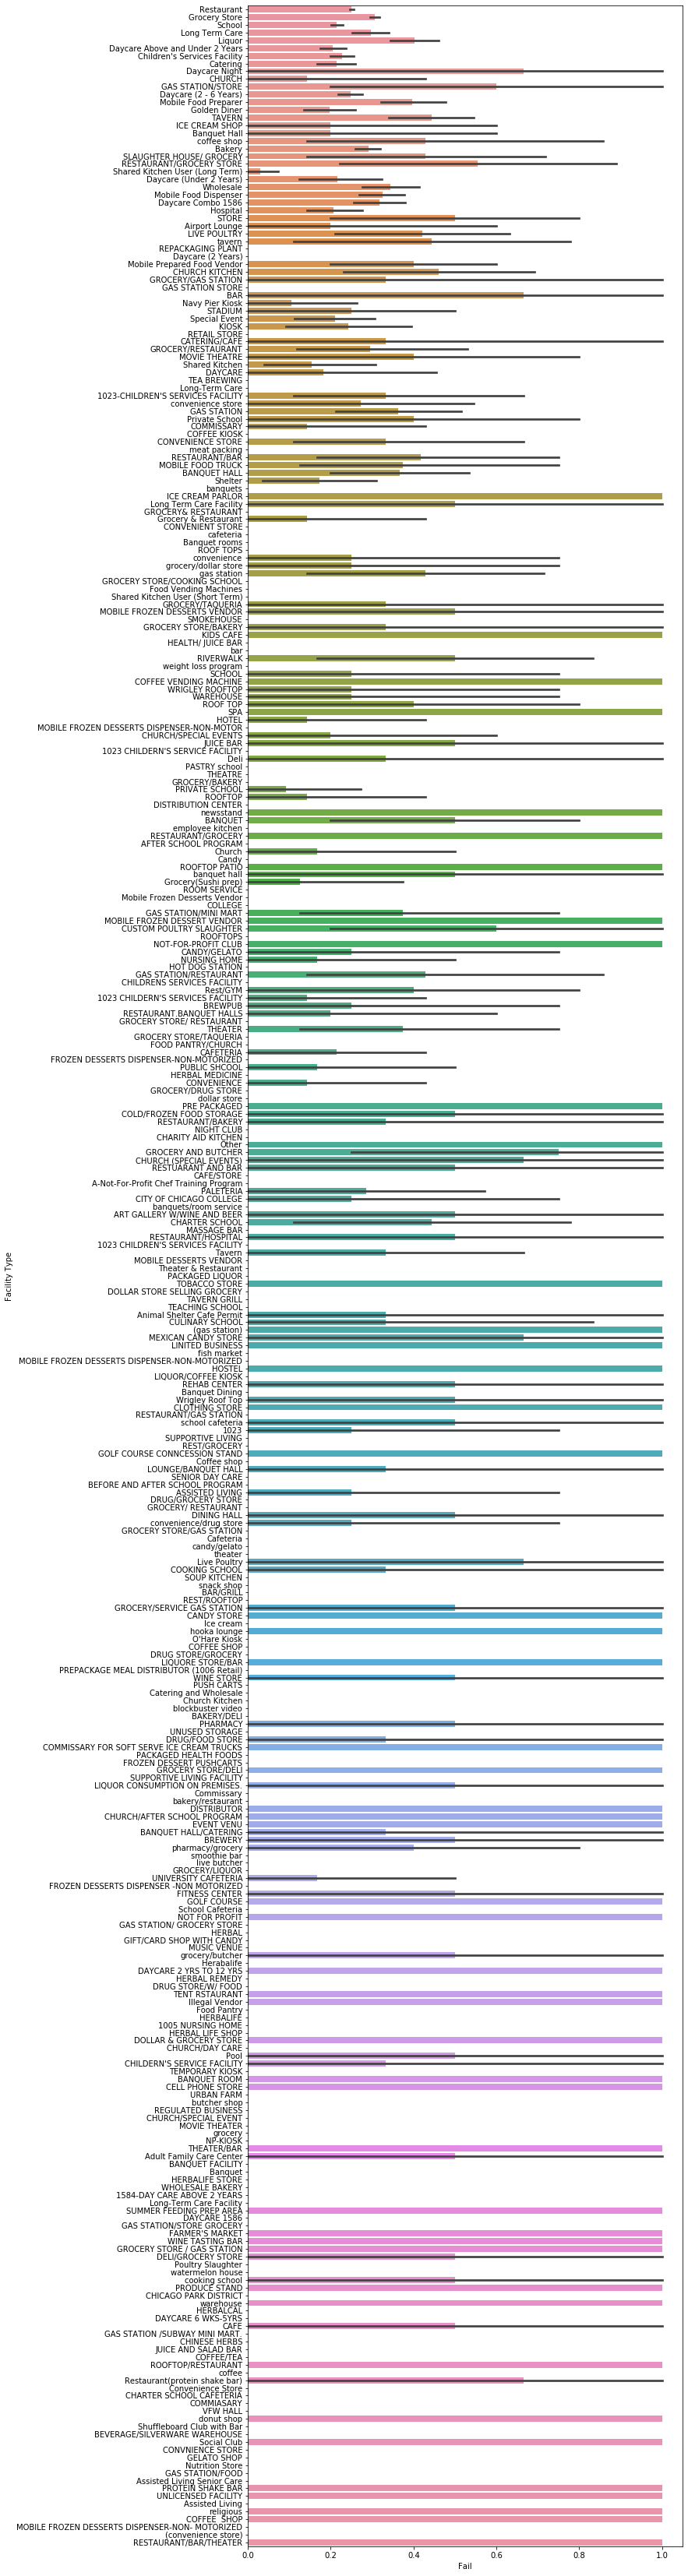

In [281]:
feature = 'Fail'
fig, ax = pyplot.subplots(figsize=(10, 60))
sns.barplot(x=train[feature], 
            y=train['Facility Type'], ax = ax);

In [ ]:
# - What does Gradient Descent seek to minimize?
#Gradient Descent seeks to minimize errors
# - What is the "Learning Rate" and what is its function?
#The learning rate can show proximity to the least amount of error. 
#When one approachest the least error, the learning rate approaches flatlining.

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:

- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

### Part 4: Gradient Descent

Answer both of these two questions:

- What does Gradient Descent seek to minimize?
- What is the "Learning Rate" and what is its function?

One sentence is sufficient for each.

_To earn a score of 3 for this part, go above and beyond. Show depth of understanding and mastery of intuition in your answers._